<a href="https://colab.research.google.com/github/kirtikumari02/Loan-Prediction/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
from google.colab import files
Train=files.upload()

Saving train_u6lujuX_CVtuZ9i.csv to train_u6lujuX_CVtuZ9i.csv


In [4]:
df=pd.read_csv("/content/train_u6lujuX_CVtuZ9i.csv")

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.shape

(614, 13)

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df["Gender"].fillna(df["Gender"].mode()[0], inplace=True)
df["Dependents"].fillna(df["Dependents"].mode()[0], inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0], inplace=True)
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0], inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0], inplace=True)
df["LoanAmount"].fillna(df["LoanAmount"].median(), inplace=True)

In [9]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              3
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

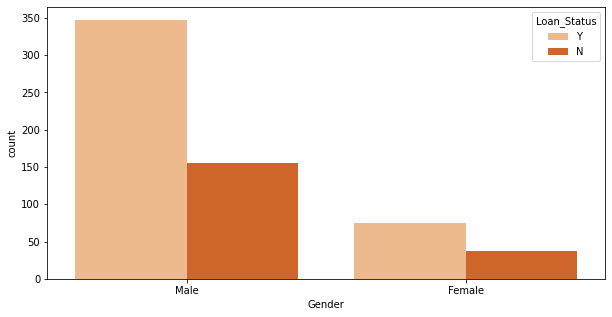

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(x='Gender',data=df,hue='Loan_Status',palette='Oranges')
plt.show()

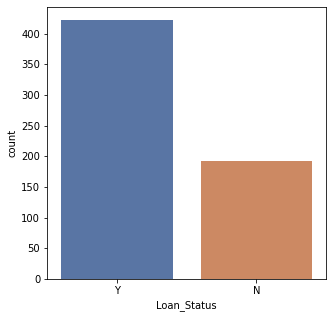

In [11]:
plt.figure(figsize=(5,5))
sns.countplot(x='Loan_Status',data=df,palette='deep')
plt.show()

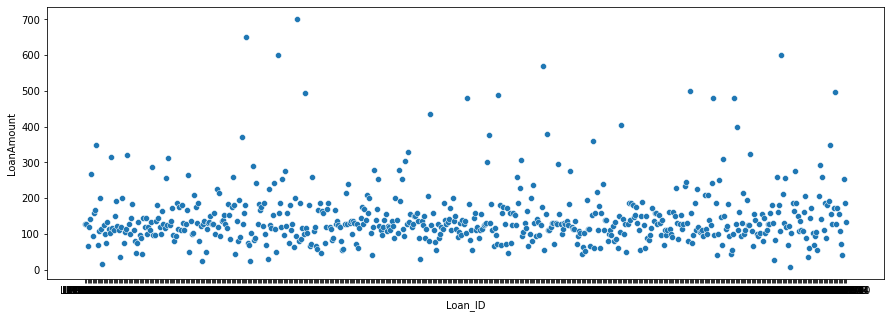

In [12]:
plt.figure(figsize=(15,5))
sns.scatterplot(x="Loan_ID",y="LoanAmount",data=df)
plt.show()

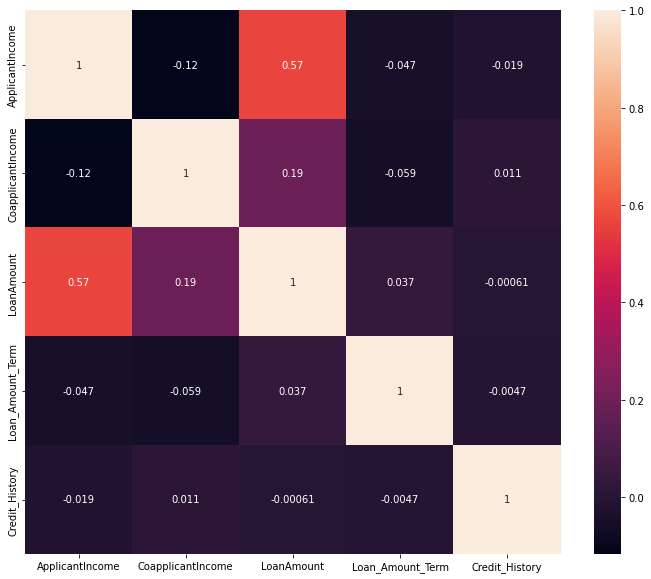

In [13]:
plt.figure(figsize=(12,10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix,annot=True)
plt.show()

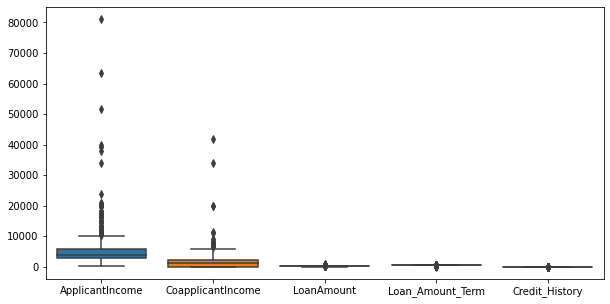

In [14]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df)
plt.show()

In [15]:
df.drop('Dependents',axis=1,inplace=True)
df.drop('ApplicantIncome',axis=1,inplace=True)
df.drop('CoapplicantIncome',axis=1,inplace=True)
df.drop('LoanAmount',axis=1,inplace=True)
df.drop('Loan_Amount_Term',axis=1,inplace=True)
df.drop('Credit_History',axis=1,inplace=True)

In [16]:
df.head()

,Loan_ID,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,Graduate,No,Urban,Y
1,LP001003,Male,Yes,Graduate,No,Rural,N
2,LP001005,Male,Yes,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,Not Graduate,No,Urban,Y
4,LP001008,Male,No,Graduate,No,Urban,Y


In [17]:
data=pd.get_dummies(df,columns=["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"])
data.head()

,Loan_ID,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,LP001002,0,1,1,0,1,0,1,0,0,0,1,0,1
1,LP001003,0,1,0,1,1,0,1,0,1,0,0,1,0
2,LP001005,0,1,0,1,1,0,0,1,0,0,1,0,1
3,LP001006,0,1,0,1,0,1,1,0,0,0,1,0,1
4,LP001008,0,1,1,0,1,0,1,0,0,0,1,0,1


In [18]:
data.drop('Gender_Female',axis=1,inplace=True)
data.drop('Married_No',axis=1,inplace=True)
data.drop('Education_Graduate',axis=1,inplace=True)
data.drop('Self_Employed_No',axis=1,inplace=True)
data.drop('Property_Area_Rural',axis=1,inplace=True)
data.drop('Loan_Status_N',axis=1,inplace=True)

In [19]:
data.head()

,Loan_ID,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,LP001002,1,0,0,0,0,1,1
1,LP001003,1,1,0,0,0,0,0
2,LP001005,1,1,0,1,0,1,1
3,LP001006,1,1,1,0,0,1,1
4,LP001008,1,0,0,0,0,1,1


In [20]:
x = data[["Gender_Male","Married_Yes","Education_Not Graduate","Self_Employed_Yes","Property_Area_Semiurban","Property_Area_Urban"]].values
y=data["Loan_Status_Y"].values

In [21]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=(0.2))

In [22]:
train_x.shape

(491, 6)

In [23]:
test_x.shape

(123, 6)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
log_clf = LogisticRegression().fit(train_x,train_y)
predict = log_clf.predict(test_x)

In [25]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report,confusion_matrix 

Logistic Regression

In [26]:
print("Logistic Regression :")
print(" accuracy is ",accuracy_score(test_y,predict))
print(" precision score is ",precision_score(test_y,predict))
print(" recall is ",recall_score(test_y,predict))
print(" f1 score is ",f1_score(test_y,predict))

Logistic Regression :
 accuracy is  0.7073170731707317
 precision score is  0.7142857142857143
 recall is  0.9770114942528736
 f1 score is  0.825242718446602


Decission Tree Classification

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=6)
dt.fit(train_x,train_y)
dt_predict=dt.predict(test_x)

In [28]:
print("Decision Tree Classifier :")
print(" accuracy is ",accuracy_score(test_y,dt_predict))
print(" precision score is ",precision_score(test_y,dt_predict))
print(" recall is ",recall_score(test_y,dt_predict))
print(" f1 score is ",f1_score(test_y,dt_predict))

Decision Tree Classifier :
 accuracy is  0.6991869918699187
 precision score is  0.7403846153846154
 recall is  0.8850574712643678
 f1 score is  0.8062827225130891


Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=150)
rf.fit(train_x,train_y)
rf_predict=rf.predict(test_x)

In [30]:
print("Random Forest Classifier :")
print(" accuracy is ",accuracy_score(test_y,rf_predict))
print(" precision score is ",precision_score(test_y,rf_predict))
print(" recall is ",recall_score(test_y,rf_predict))
print(" f1 score is ",f1_score(test_y,rf_predict))

Random Forest Classifier :
 accuracy is  0.6747967479674797
 precision score is  0.7117117117117117
 recall is  0.9080459770114943
 f1 score is  0.7979797979797979


Support Vector Classifier (SVC)

In [31]:
from sklearn.svm import SVC 
svc=SVC()
svc.fit(train_x,train_y)
svc_predict=svc.predict(test_x)

In [32]:
print("Support Vector Classifier :")
print(" accuracy is ",accuracy_score(test_y,svc_predict))
print(" precision score is ",precision_score(test_y,svc_predict))
print(" recall is ",recall_score(test_y,svc_predict))
print(" f1 score is ",f1_score(test_y,svc_predict))

Support Vector Classifier :
 accuracy is  0.7073170731707317
 precision score is  0.7107438016528925
 recall is  0.9885057471264368
 f1 score is  0.8269230769230769


In [33]:
print("For Logistic Regression :")
print(" accuracy is ",accuracy_score(test_y,predict))
print("For Decision tree :")
print(" accuracy is ",accuracy_score(test_y,dt_predict))
print("For Random Forest :")
print(" accuracy is ",accuracy_score(test_y,rf_predict))
print("For Support Vector :")
print(" accuracy is ",accuracy_score(test_y,svc_predict))

For Logistic Regression :
 accuracy is  0.7073170731707317
For Decision tree :
 accuracy is  0.6991869918699187
For Random Forest :
 accuracy is  0.6747967479674797
For Support Vector :
 accuracy is  0.7073170731707317



Voting\Stacking

In [34]:
from sklearn.metrics import log_loss

In [35]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[('LogReg', log_clf), ('DTree', dt), ('RanFor', rf), ('SVC', svc)], voting='hard')
voting_clf.fit(train_x, train_y)
preds = voting_clf.predict(test_x)
acc = accuracy_score(test_y, preds)
l_loss = log_loss(test_y, preds)
f1 = f1_score(test_y, preds)

print('Accuracy is:' + str(acc))
print('Log Loss is:' + str(l_loss))
print('F1 Score is:' + str(f1))

Accuracy is:0.6910569105691057
Log Loss is:10.670717809162129
F1 Score is:0.8080808080808081


Bagging

In [36]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import KFold, cross_val_score

In [37]:
logreg_bagging_model = BaggingClassifier(base_estimator=log_clf, n_estimators =50, random_state=12)
dTree_bagging_model = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=12)
random_forest = RandomForestClassifier(n_estimators =100, random_state=12)
extra_trees = ExtraTreesClassifier(n_estimators=100, random_state=12)

def bagging_ensemble(model):
    k_folds = KFold(n_splits=20)
    results = cross_val_score(model, train_x, train_y, cv=k_folds)
    print(results.mean())

bagging_ensemble(logreg_bagging_model)
bagging_ensemble(dTree_bagging_model)
bagging_ensemble(random_forest)
bagging_ensemble(extra_trees)

0.6718333333333333
0.6554166666666668
0.6554166666666668
0.6574166666666666
